In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
transactions = transactions.merge(products, on="ProductID")
data = transactions.merge(customers, on="CustomerID")

In [4]:
agg_data = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count",
    "Quantity": "sum"
}).reset_index()
agg_data.columns = ["CustomerID", "TotalSpend", "TransactionCount", "TotalQuantity"]


In [5]:
customer_data = customers[["CustomerID", "Region"]]
agg_data = agg_data.merge(customer_data, on="CustomerID")

In [6]:
le = LabelEncoder()
agg_data["Region"] = le.fit_transform(agg_data["Region"])

In [7]:
features = agg_data.drop(columns=["CustomerID"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
best_db_index = float("inf")
best_k = 0
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    results.append((k, db_index))
    
    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k

print(f"Best DB Index: {best_db_index} for {best_k} clusters.")


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Best DB Index: 0.9198360716444208 for 7 clusters.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

performance_metrics = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    
    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette = silhouette_score(scaled_features, labels)
    ch_index = calinski_harabasz_score(scaled_features, labels)
    inertia = kmeans.inertia_
    
    performance_metrics.append({
        'Clusters': n_clusters,
        'DB Index': db_index,
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Index': ch_index,
        'Inertia': inertia
    })

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(performance_metrics)
print(metrics_df)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

   Clusters  DB Index  Silhouette Score  Calinski-Harabasz Index     Inertia
0         2  1.043024          0.369950               158.557347  441.031528
1         3  1.133916          0.297839               134.030184  336.197638
2         4  1.025914          0.318387               124.590434  272.904064
3         5  1.017461          0.332092               129.271924  217.165901
4         6  0.973060          0.322379               122.251997  191.017834
5         7  0.919836          0.328997               125.592910  161.631637
6         8  1.030521          0.290146               107.678435  160.927392
7         9  1.066624          0.274009               106.022391  145.678136
8        10  1.104861          0.269770               103.813594  133.927720


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_features)

non_outliers = labels != -1
silhouette = silhouette_score(scaled_features[non_outliers], labels[non_outliers])

print(f"Silhouette Score for DBSCAN: {silhouette}")

Silhouette Score for DBSCAN: 0.4593335082555978


In [11]:
from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clust.fit_predict(scaled_features)

silhouette = silhouette_score(scaled_features, labels)

print(f"Silhouette Score for Agglomerative Clustering: {silhouette}")

Silhouette Score for Agglomerative Clustering: 0.30745236445246454


In [12]:
agg_data["Cluster"] = kmeans.labels_
agg_data.to_csv("Clustered_Customers.csv", index=False)

In [13]:
results_df = pd.DataFrame(results, columns=["Number of Clusters", "DB Index"])
print(results_df)

   Number of Clusters  DB Index
0                   2  1.043024
1                   3  1.133916
2                   4  1.025914
3                   5  1.017461
4                   6  0.973060
5                   7  0.919836
6                   8  1.030521
7                   9  1.066624
8                  10  1.104861


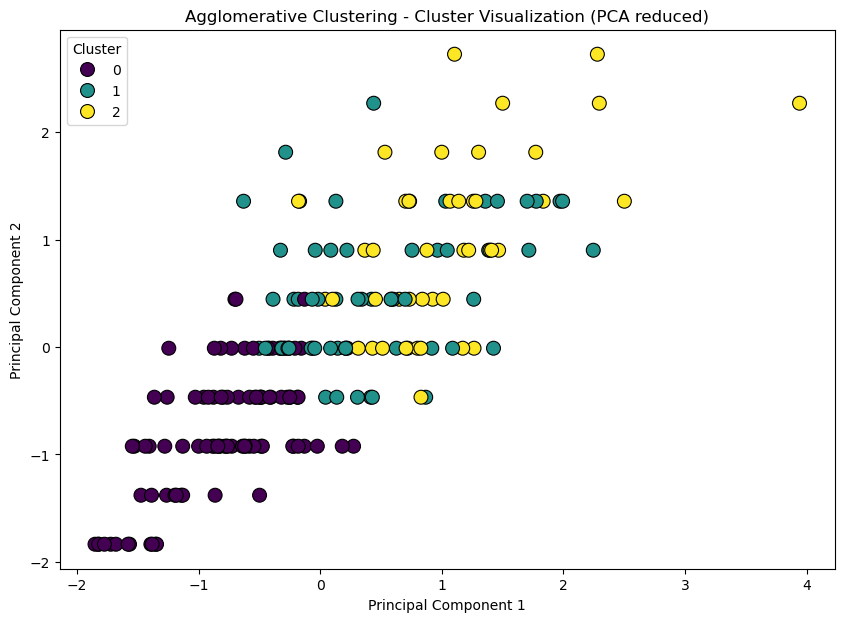

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels, palette='viridis', s=100, edgecolor='k')
plt.title('Agglomerative Clustering - Cluster Visualization (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()